# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
sinasc = pd.read_csv('sinasc_RO_2019.csv')
sinasc.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

In [3]:
sinasc_red = sinasc[['APGAR1', 'APGAR5', 'SEXO', 'GESTACAO', 'ESTCIVMAE', 'CONSULTAS']]
sinasc_red.head()

,APGAR1,APGAR5,SEXO,GESTACAO,ESTCIVMAE,CONSULTAS
0,9.0,10.0,Masculino,37 a 41 semanas,5.0,4
1,8.0,9.0,Feminino,37 a 41 semanas,2.0,4
2,8.0,10.0,Feminino,37 a 41 semanas,9.0,4
3,9.0,10.0,Feminino,37 a 41 semanas,5.0,3
4,8.0,10.0,Feminino,37 a 41 semanas,2.0,4


In [4]:
# Configurar o estilo do Seaborn
sns.set(style="whitegrid")

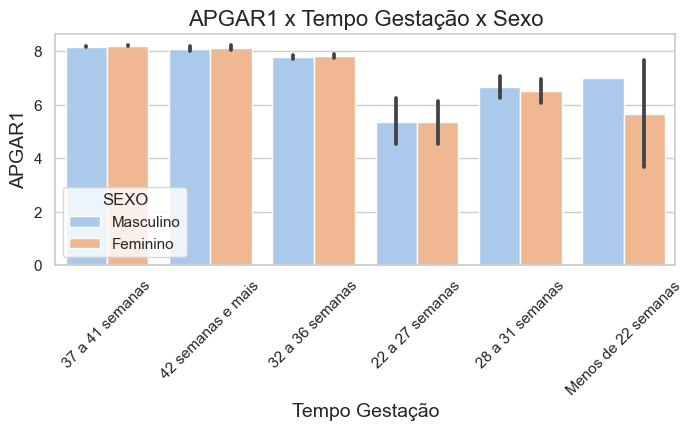

In [5]:
# APGAR1 x Tempo Gestação x Sexo
plt.figure(figsize=(8, 3))

sns.barplot(x='GESTACAO', y='APGAR1', hue='SEXO', data=sinasc_red, orient='v', palette='pastel')

plt.xticks(rotation=45)
plt.title("APGAR1 x Tempo Gestação x Sexo", fontsize=16)
plt.xlabel("Tempo Gestação", fontsize=14)
plt.ylabel("APGAR1", fontsize=14)
plt.show()


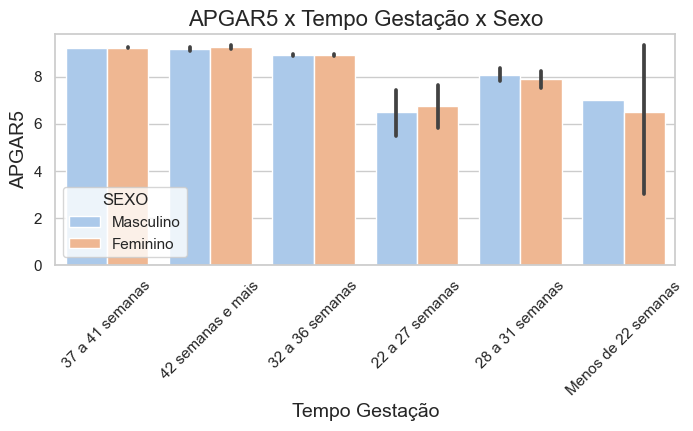

In [6]:
# APGAR5 x Tempo Gestação x Sexo
plt.close('all')
plt.figure(figsize=(8, 3))

sns.barplot(x='GESTACAO', y='APGAR5', hue='SEXO', data=sinasc_red, orient='v', palette='pastel')

plt.xticks(rotation=45)
plt.title("APGAR5 x Tempo Gestação x Sexo", fontsize=16)
plt.xlabel("Tempo Gestação", fontsize=14)
plt.ylabel("APGAR5", fontsize=14)
plt.show()


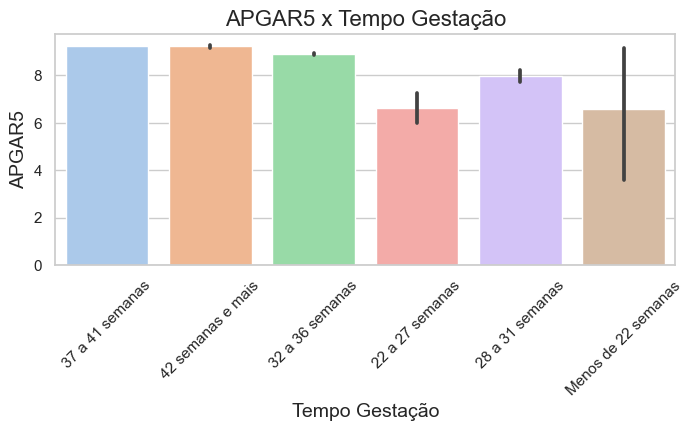

In [7]:
# APGAR5 x Tempo Gestação
plt.close('all')
plt.figure(figsize=(8, 3))

sns.barplot(x='GESTACAO', y='APGAR5', data=sinasc_red, orient='v', palette='pastel')

plt.xticks(rotation=45)
plt.title("APGAR5 x Tempo Gestação", fontsize=16)
plt.xlabel("Tempo Gestação", fontsize=14)
plt.ylabel("APGAR5", fontsize=14)
plt.show()

In [8]:
# Decodificando o Estado Civil
estado_civil = {
    1: 'Solteira',
    2: 'Casada',
    3: 'Viúva',
    4: 'Separado-Divorciado',
    5: 'União consensual',
    9: 'Ignorado'
}

sinasc_red['ESTCIVMAE'] = sinasc_red['ESTCIVMAE'].map(estado_civil)
sinasc_red.head()

C:\Users\ricme\AppData\Local\Temp\ipykernel_23556\2412837962.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinasc_red['ESTCIVMAE'] = sinasc_red['ESTCIVMAE'].map(estado_civil)


,APGAR1,APGAR5,SEXO,GESTACAO,ESTCIVMAE,CONSULTAS
0,9.0,10.0,Masculino,37 a 41 semanas,União consensual,4
1,8.0,9.0,Feminino,37 a 41 semanas,Casada,4
2,8.0,10.0,Feminino,37 a 41 semanas,Ignorado,4
3,9.0,10.0,Feminino,37 a 41 semanas,União consensual,3
4,8.0,10.0,Feminino,37 a 41 semanas,Casada,4


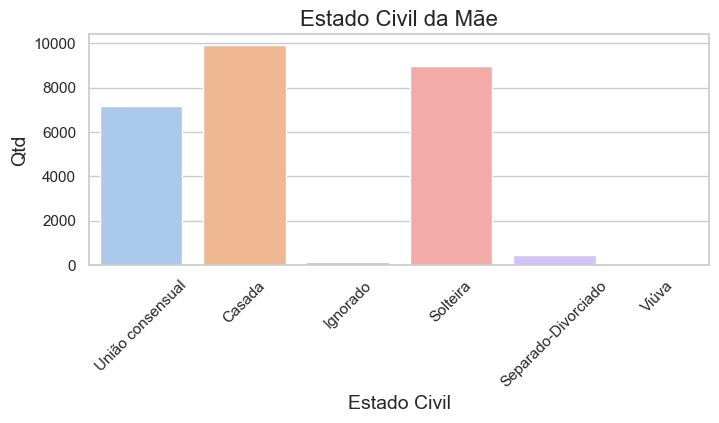

In [9]:
# Estado Civil
plt.close('all')
plt.figure(figsize=(8, 3))

sns.countplot(x='ESTCIVMAE', data=sinasc_red, orient='v', palette='pastel')

plt.xticks(rotation=45)
plt.title("Estado Civil da Mãe", fontsize=16)
plt.xlabel("Estado Civil", fontsize=14)
plt.ylabel("Qtd", fontsize=14)
plt.show()

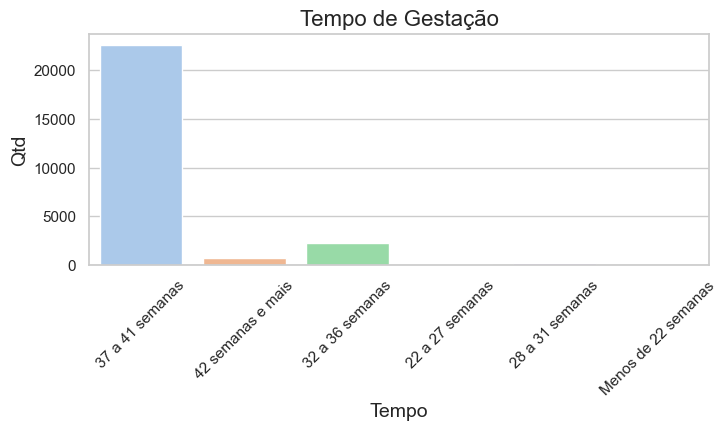

In [10]:
# Tempo de Gestação
plt.close('all')
plt.figure(figsize=(8, 3))

sns.countplot(x='GESTACAO', data=sinasc_red, orient='v', palette='pastel')

plt.xticks(rotation=45)
plt.title("Tempo de Gestação", fontsize=16)
plt.xlabel("Tempo", fontsize=14)
plt.ylabel("Qtd", fontsize=14)
plt.show()

#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

In [11]:
# Decodificando a coluna CONSULTAS
consultas = {
    1: 'Nenhuma',
    2: 'de 1 a 3',
    3: 'de 4 a 6',
    4: '7 e mais',
    9: 'Ignorado'
}
sinasc_red['CONSULTAS'] = sinasc_red['CONSULTAS'].map(consultas)
sinasc_red.head()

C:\Users\ricme\AppData\Local\Temp\ipykernel_23556\2112232450.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinasc_red['CONSULTAS'] = sinasc_red['CONSULTAS'].map(consultas)


,APGAR1,APGAR5,SEXO,GESTACAO,ESTCIVMAE,CONSULTAS
0,9.0,10.0,Masculino,37 a 41 semanas,União consensual,7 e mais
1,8.0,9.0,Feminino,37 a 41 semanas,Casada,7 e mais
2,8.0,10.0,Feminino,37 a 41 semanas,Ignorado,7 e mais
3,9.0,10.0,Feminino,37 a 41 semanas,União consensual,de 4 a 6
4,8.0,10.0,Feminino,37 a 41 semanas,Casada,7 e mais


In [12]:
apgar5_medio = sinasc_red.groupby('CONSULTAS')['APGAR5'].mean()
apgar5_medio

CONSULTAS
7 e mais    9.207188
Ignorado    8.860000
Nenhuma     8.981481
de 1 a 3    9.057395
de 4 a 6    9.154440
Name: APGAR5, dtype: float64

####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

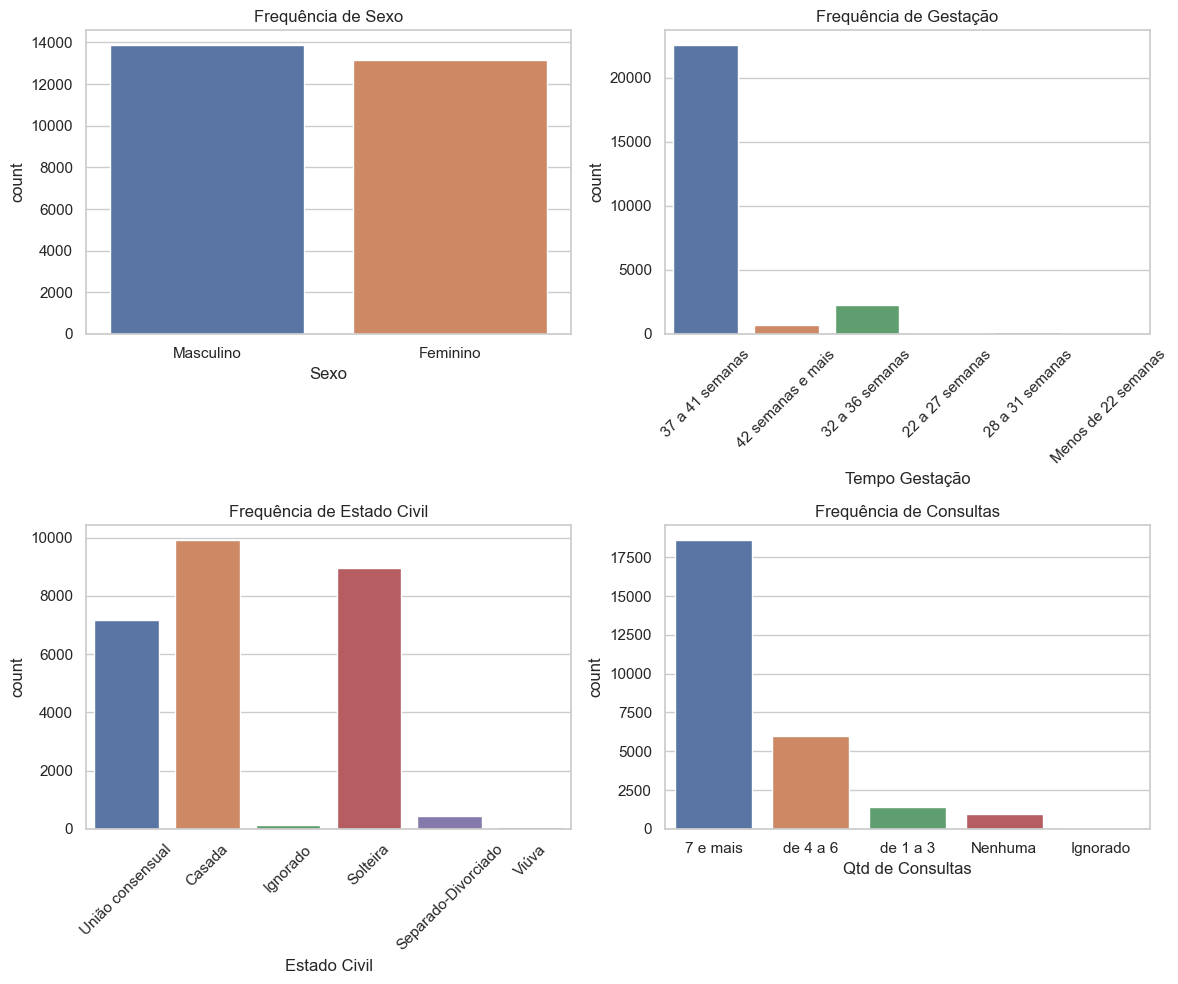

In [13]:
plt.close('all')
plt.rc('figure', figsize=(12, 8))
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
# fig, axes = plt.subplots(2, 2)

# Gráfico 1 - Frequência de SEXO
sns.countplot(data=sinasc_red, x='SEXO', ax=axes[0, 0])
axes[0, 0].set_title('Frequência de Sexo')
axes[0, 0].set_xlabel('Sexo')

# Gráfico 2 - Frequência de GESTACAO
sns.countplot(data=sinasc_red, x='GESTACAO', ax=axes[0, 1])
axes[0, 1].set_title('Frequência de Gestação')
axes[0, 1].set_xlabel('Tempo Gestação')
axes[0, 1].tick_params(axis='x', rotation=45)

# Gráfico 3 - Frequência de ESTCIVMAE
sns.countplot(data=sinasc_red, x='ESTCIVMAE', ax=axes[1, 0])
axes[1, 0].set_title('Frequência de Estado Civil')
axes[1, 0].set_xlabel('Estado Civil')
axes[1, 0].tick_params(axis='x', rotation=45)

# Gráfico 4 - Frequência de CONSULTAS
sns.countplot(data=sinasc_red, x='CONSULTAS', ax=axes[1, 1])
axes[1, 1].set_title('Frequência de Consultas')
axes[1, 1].set_xlabel('Qtd de Consultas')

plt.tight_layout()
plt.show()